**Microsoft Stock Price Prediction**

In this python project, we will implement Microsoft Stock Price Prediction with a Machine Learning technique. We will use TensorFlow, an Open-Source Python Machine Learning Framework developed by Google. TensorFlow makes it easy to implement Time Series forecasting data. Since Stock Price Prediction is one of the Time Series Forecasting problems, we will build an end-to-end Microsoft Stock Price Prediction with a Machine learning technique.

**Importing Libraries and Dataset**

In [1]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [4]:
microsoft = pd.read_csv('/content/sample_data/MicrosoftStock.csv', usecols=lambda col: col != 'index')
print(microsoft.head())
microsoft.shape
microsoft.info()
microsoft.describe()

         date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


**Exploratory Data Analysis**

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations

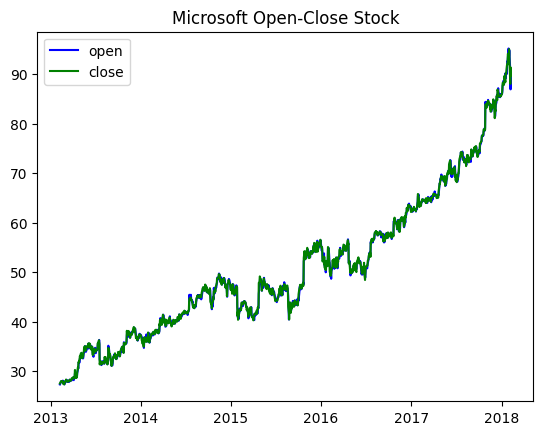

In [5]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
plt.plot(microsoft['date'],
		microsoft['open'],
		color="blue",
		label="open")
plt.plot(microsoft['date'],
		microsoft['close'],
		color="green",
		label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()

# This code is modified by Susobhan Akhuli

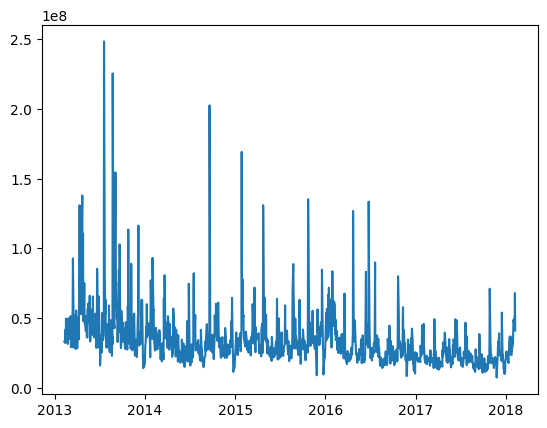

In [6]:
plt.plot(microsoft['date'],
         microsoft['volume'])
plt.show()

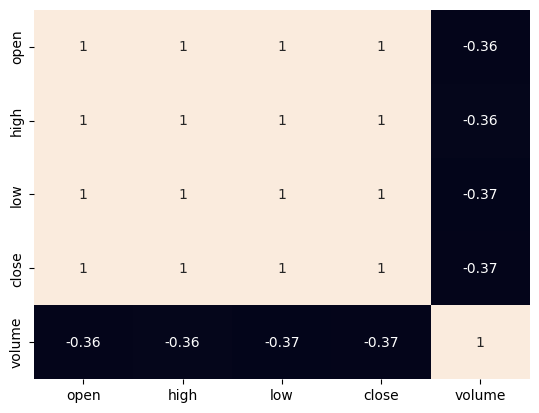

In [7]:
sns.heatmap(microsoft.select_dtypes(include=np.number).corr(),
			annot=True,
			cbar=False)
plt.show()


Text(0.5, 1.0, 'Microsoft Stock Prices')

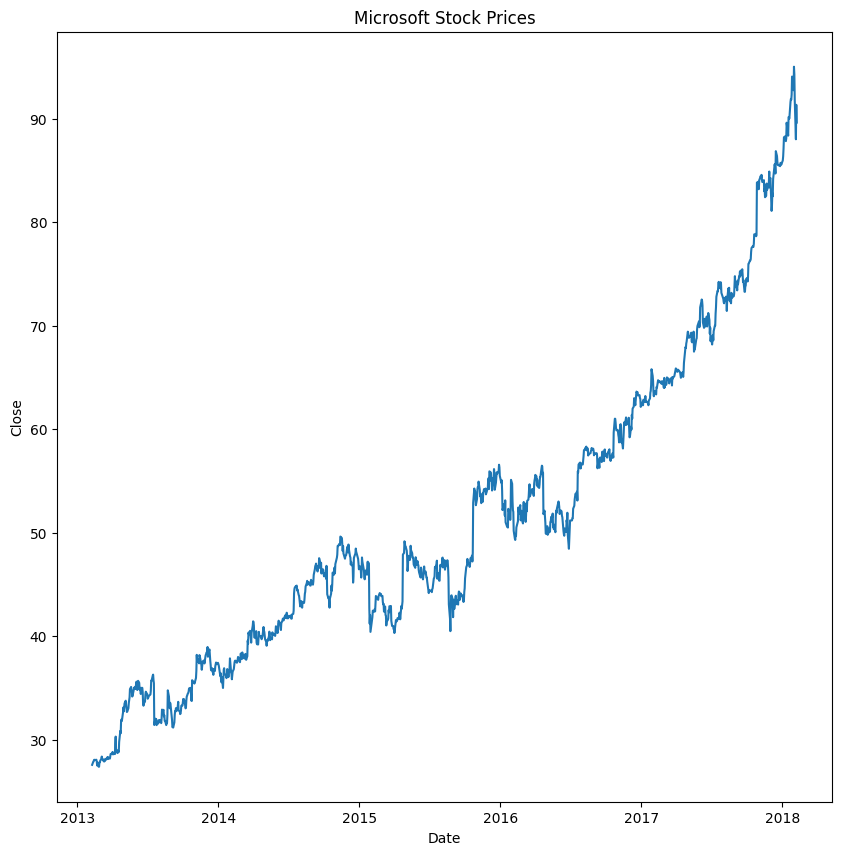

In [8]:
microsoft['date'] = pd.to_datetime(microsoft['date'])
prediction = microsoft.loc[(microsoft['date']
                            > datetime(2013, 1, 1))
                            & (microsoft['date']
                            < datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

In [9]:
# prepare the training set samples
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training = int(np.ceil(len(dataset) * .95))

# scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :]

x_train = []
y_train = []

# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train,
					(x_train.shape[0],
					x_train.shape[1], 1))



**Build the Model**

To tackle the Time Series or Stock Price Prediction problem statement, we build a Recurrent Neural Network model, that comes in very handy to memorize the previous state using cell state and memory state. Since RNNs are hard to train and prune to Vanishing Gradient, we use LSTM which is the RNN gated cell, LSTM reduces the problem of Vanishing gradients.

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape
                            =(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


Compile and Fit

While compiling a model we provide these three essential parameters:

    * optimizer – This is the method that helps to optimize the cost function by using gradient descent.
    * loss – The loss function by which we monitor whether the model is improving with training or not.
    * metrics – This helps to evaluate the model by predicting the training and the validation data.

In [11]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
            loss='mae',
            metrics=[RootMeanSquaredError()])

history = model.fit(X_train, y_train,
					epochs=20)



Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - loss: 0.3415 - root_mean_squared_error: 0.4602
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.1115 - root_mean_squared_error: 0.1449
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.1039 - root_mean_squared_error: 0.1404
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.1026 - root_mean_squared_error: 0.1390
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0960 - root_mean_squared_error: 0.1282
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0852 - root_mean_squared_error: 0.1129
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0811 - root_mean_squared_error: 0.1084
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0890 - root_mean_squared_error: 0.1192
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0976 - root_mean_squared_error: 0.1355
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0784 - root_mean_squared_error: 0.10

**Model Evaluation**

Now as we have our model ready let’s evaluate its performance on the validation data using different metrics. For this purpose, we will first predict the class for the validation data using this model and then compare the output with the true labels.

In [12]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1], 1))

pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step


/tmp/ipython-input-838853255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


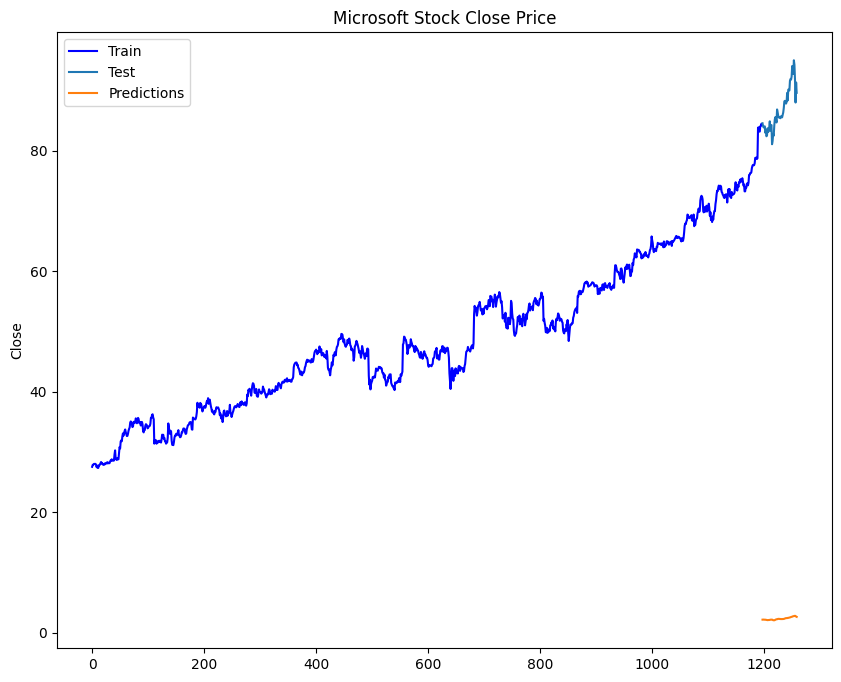

In [13]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])